## **Тема дипломного проекта: "Разработка игры в жанре данжен-кроулер на unity с применением процедурной генерации уровня**


### **Необходимо выполнить:**




1. **Разработать календарный план проекта в формате диаграммы Ганта**:
   - Определите все основные этапы и задачи вашего дипломного проекта
   - Установите реалистичные сроки выполнения каждой задачи
   - Отобразите зависимости между задачами

2. **Выполнить анализ и разработать систему управления рисками проекта**:
   - Определите не менее 3-5 потенциальных рисков, специфичных для вашего проекта
   - Оцените вероятность возникновения и степень влияния каждого риска
   - Разработайте конкретные стратегии реагирования на каждый риск
   - Представьте результаты в виде структурированной таблицы

3. **Определить основные контрольные точки проекта**:
   - Выделите 3-5 важнейших контрольных точек процесса разработки
   - Для каждой контрольной точки сформулируйте чёткие, измеримые критерии достижения
   - Установите конкретные даты для контрольных точек
   - Укажите ответственных (если проект групповой) и необходимые ресурсы

4. **Подготовить пояснительную записку**:
   - Обоснуйте выбранную структуру работ календарного плана
   - Поясните методологию анализа рисков и принципы определения контрольных точек
   - Опишите взаимосвязь между всеми компонентами системы

### **1. Календарный план проекта (диаграмма Ганта)**

#### **Функция Python для построения диаграммы Ганта:**

In [ ]:
def create_gantt_chart(tasks, title="Диаграмма Ганта", save_path="gantt_chart.png", figsize=(16, 8)):
    """
    Создает и сохраняет диаграмму Ганта в виде таблицы на основе предоставленных данных о задачах.

    Параметры:
    ----------
    tasks : list of dict
        Список словарей, каждый из которых содержит информацию о задаче в формате:
        {"Task": "Название задачи", "Start": "YYYY-MM-DD", "End": "YYYY-MM-DD", "Group": "Группа задачи"}
    title : str, optional
        Заголовок диаграммы
    save_path : str, optional
        Путь для сохранения изображения
    figsize : tuple, optional
        Размер изображения (ширина, высота) в дюймах

    Возвращает:
    -----------
    None (сохраняет изображение и отображает его)
    """
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    from datetime import datetime, timedelta

    # Создание DataFrame и преобразование дат
    df = pd.DataFrame(tasks)
    df['Start'] = pd.to_datetime(df['Start'])
    df['End'] = pd.to_datetime(df['End'])

    # Определение временного диапазона проекта
    project_start = df['Start'].min().date()
    project_end = df['End'].max().date()
    project_duration = (project_end - project_start).days + 1

    # Создание всех дат проекта
    all_dates = [project_start + timedelta(days=i) for i in range(project_duration)]
    date_labels = [date.strftime('%d-%m') for date in all_dates]

    # Создание длинного формата данных для heatmap
    gantt_data = []
    for i, task in enumerate(df.itertuples()):
        task_start = task.Start.date()
        task_end = task.End.date()
        for date in all_dates:
            is_active = 1 if task_start <= date <= task_end else 0
            gantt_data.append({
                'Task': task.Task,
                'Date': date.strftime('%Y-%m-%d'),
                'Active': is_active,
                'Group': task.Group
            })

    # Преобразование в DataFrame
    gantt_df = pd.DataFrame(gantt_data)

    # Преобразование в матричный формат для heatmap
    gantt_matrix = gantt_df.pivot(index='Task', columns='Date', values='Active')

    # Получение уникальных групп задач
    groups = df['Group'].unique()

    # Создание цветовой схемы для групп
    group_values = {group: i+1 for i, group in enumerate(groups)}

    # Создание матрицы с группами
    group_matrix = np.zeros_like(gantt_matrix.values)
    for i, task in enumerate(gantt_matrix.index):
        group = df[df['Task'] == task]['Group'].values[0]
        group_value = group_values[group]
        active_indices = np.where(gantt_matrix.iloc[i, :] == 1)
        group_matrix[i, active_indices] = group_value

    # Настройка цветовой схемы - исправлено для устранения deprecation warning
    num_colors = len(group_values) + 1
    cmap = plt.colormaps['Paired']  # Используем plt.colormaps вместо plt.cm.get_cmap
    colors = [cmap(i/(num_colors-1)) for i in range(num_colors)]
    custom_cmap = plt.matplotlib.colors.ListedColormap(['white'] + colors[1:])

    # Создание фигуры с дополнительным пространством для легенды
    fig, ax = plt.subplots(figsize=figsize)

    # Создание heatmap с seaborn
    ax = sns.heatmap(group_matrix, cmap=custom_cmap, cbar=False,
                    linewidths=.5, linecolor='gray',
                    xticklabels=date_labels, yticklabels=gantt_matrix.index, ax=ax)

    # Настройка осей
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Дата', fontsize=12)
    ax.set_ylabel('Задача', fontsize=12)

    # Настройка частоты меток по оси X (каждые 7 дней)
    tick_positions = np.arange(0, project_duration, 7)
    ax.set_xticks(tick_positions)
    ax.set_xticklabels([all_dates[pos].strftime('%d-%m-%Y') for pos in tick_positions], rotation=45)

    # Добавление сетки для недель
    for week_pos in tick_positions:
        plt.axvline(x=week_pos, color='gray', linestyle='-', linewidth=0.5, alpha=0.5)

    # Добавление легенды вне области графика
    legend_elements = [plt.Rectangle((0, 0), 1, 1, facecolor=colors[group_values[group]],
                                    edgecolor='gray', label=group)
                      for group in group_values.keys()]

    # Размещаем легенду вне области графика (справа от диаграммы)
    ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1.02, 0.5),
             fontsize=10, frameon=True, fancybox=True, shadow=True)

    # Оптимизация размещения
    plt.tight_layout()

    # Сохранение с высоким разрешением
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()

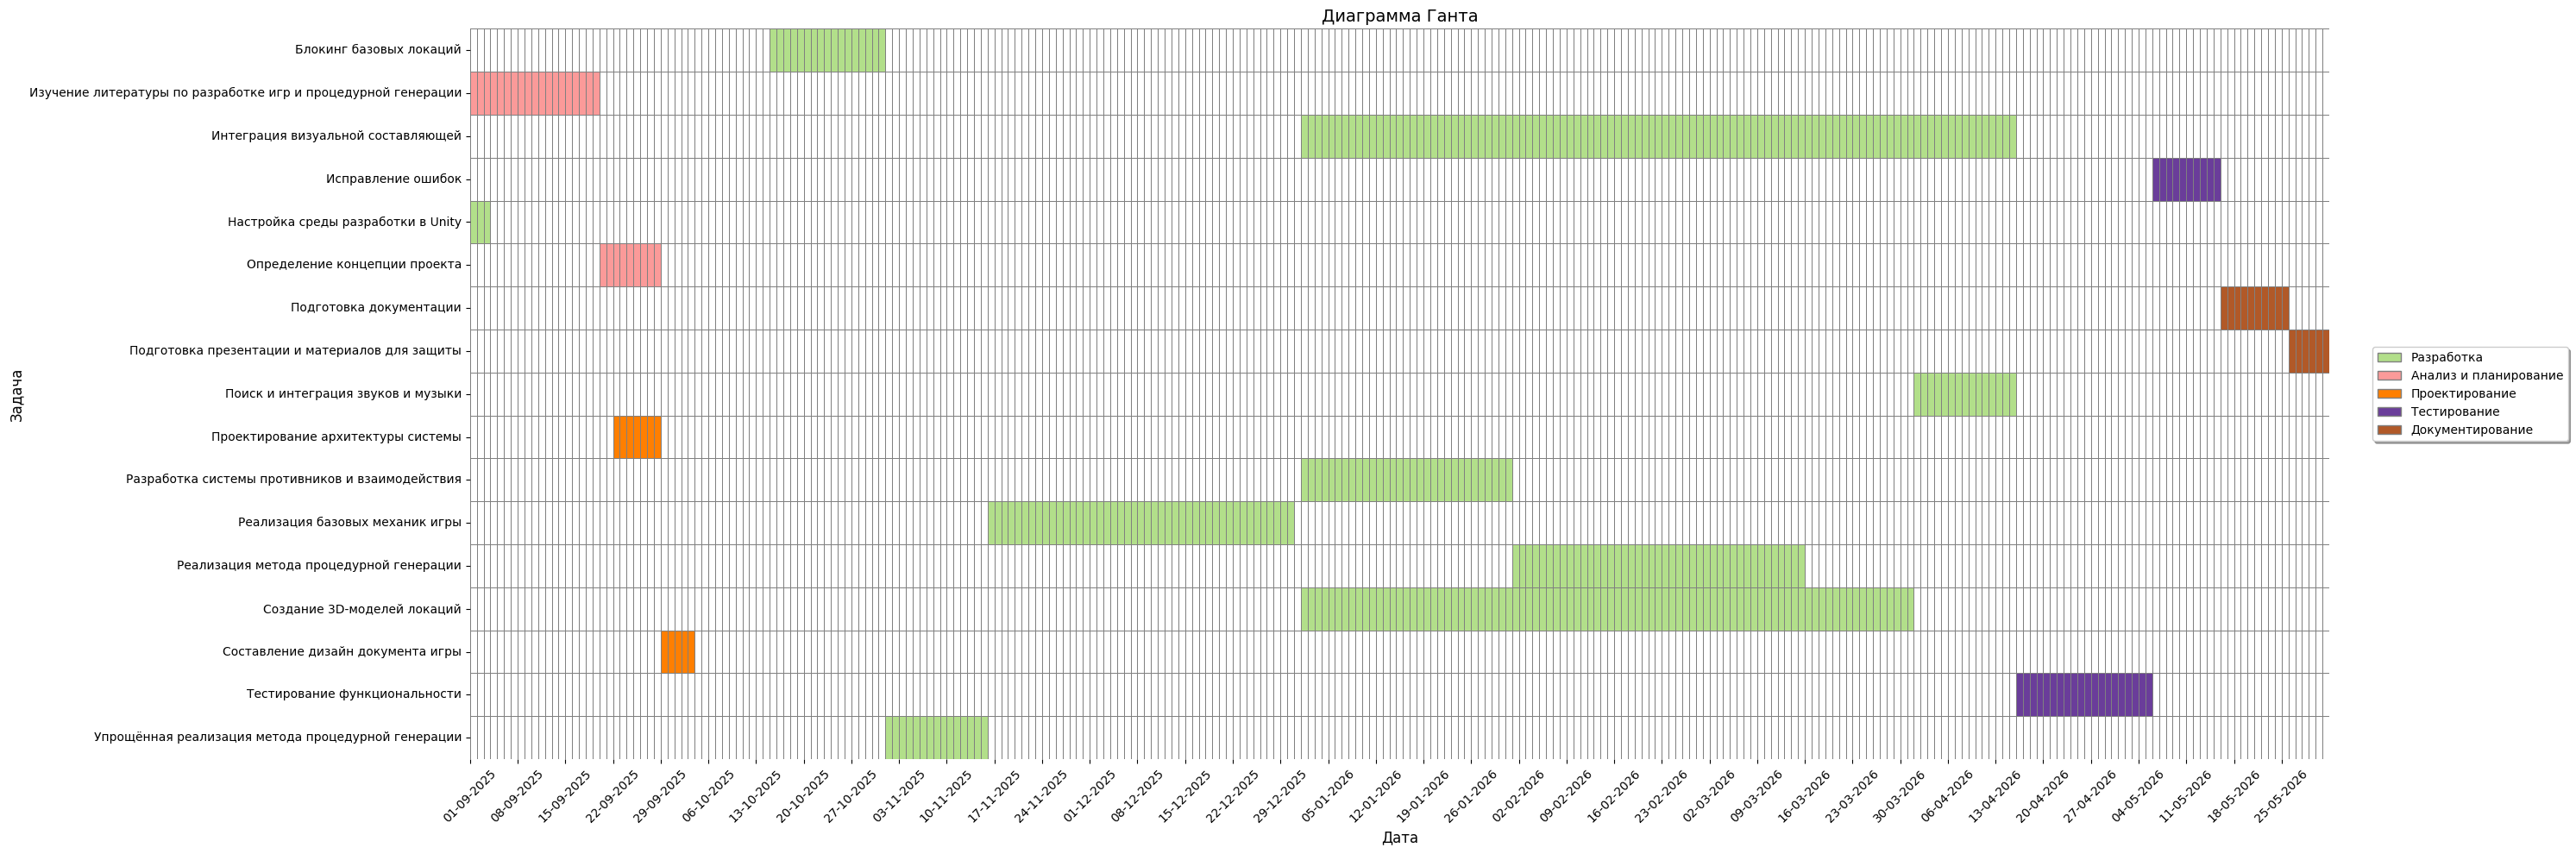

In [ ]:
sample_tasks = [
    {"Task": "Настройка среды разработки в Unity", "Start": "2025-09-01", "End": "2025-09-03", "Group": "Разработка"},
    {"Task": "Изучение литературы по разработке игр и процедурной генерации", "Start": "2025-09-01", "End": "2025-09-19", "Group": "Анализ и планирование"},
    {"Task": "Определение концепции проекта", "Start": "2025-09-20", "End": "2025-09-28", "Group": "Анализ и планирование"},
    {"Task": "Проектирование архитектуры системы", "Start": "2025-09-22", "End": "2025-09-28", "Group": "Проектирование"},
    {"Task": "Составление дизайн документа игры", "Start": "2025-09-29", "End": "2025-10-03", "Group": "Проектирование"},
    {"Task": "Блокинг базовых локаций", "Start": "2025-10-15", "End": "2025-10-31", "Group": "Разработка"},
    {"Task": "Упрощённая реализация метода процедурной генерации", "Start": "2025-11-01", "End": "2025-11-15", "Group": "Разработка"},
    {"Task": "Реализация базовых механик игры", "Start": "2025-11-16", "End": "2025-12-30", "Group": "Разработка"},
    {"Task": "Разработка системы противников и взаимодействия", "Start": "2026-01-01", "End": "2026-01-31", "Group": "Разработка"},
    {"Task": "Реализация метода процедурной генерации", "Start": "2026-02-01", "End": "2026-03-15", "Group": "Разработка"},
    {"Task": "Создание 3D-моделей локаций", "Start": "2026-01-01", "End": "2026-03-31", "Group": "Разработка"},
    {"Task": "Поиск и интеграция звуков и музыки", "Start": "2026-04-01", "End": "2026-04-15", "Group": "Разработка"},
    {"Task": "Интеграция визуальной составляющей", "Start": "2026-01-01", "End": "2026-04-15", "Group": "Разработка"},
    {"Task": "Тестирование функциональности", "Start": "2026-04-16", "End": "2026-05-05", "Group": "Тестирование"},
    {"Task": "Исправление ошибок", "Start": "2026-05-06", "End": "2026-05-15", "Group": "Тестирование"},
    {"Task": "Подготовка документации", "Start": "2026-05-16", "End": "2026-05-25", "Group": "Документирование"},
    {"Task": "Подготовка презентации и материалов для защиты", "Start": "2026-05-26", "End": "2026-05-31", "Group": "Документирование"}
]

create_gantt_chart(
    tasks=sample_tasks,
    save_path="gantt_chart_dungeon_crawler.png",
    figsize=(30, 10)
)

#### **Задачи проекта:**

| ID | Задача | Длительность (дни) | Предшественники | Начало | Окончание |
|----|--------|-------------------|----------------|--------|-----------|
| 1 | Настройка среды разработки в Unity | 3 | - | 2025-09-01 | 2025-09-03 |
| 2 | Изучение литературы по разработке игр и процедурной генерации | 14 | 1 | 2025-09-01 | 2025-09-19 |
| 3 | Определение концепции проекта | 6 | 2 | 2025-09-20 | 2025-09-28 |
| 4 | Проектирование архитектуры системы | 5 | 3 | 2025-09-22 | 2025-09-28 |
| 5 | Составление дизайн документа игры | 3 | 3 | 2025-09-29 | 2025-10-03 |
| 6 | Блокинг базовых локаций | 12 | 5 | 2025-10-15 | 2025-10-31 |
| 7 | Упрощённая реализация метода процедурной генерации | 11 | 6 | 2025-11-01 | 2025-11-15 |
| 8 | Реализация базовых механик игры | 33 | 7 | 2025-11-16 | 2025-12-30 |
| 9 | Разработка системы противников и взаимодействия | 21 | 8 | 2026-01-01 | 2026-01-31 |
| 10 | Реализация метода процедурной генерации | 33 | 9 | 2026-02-01 | 2026-03-15 |
| 11 | Создание 3D-моделей локаций | 65 | 8 | 2026-01-01 | 2026-03-31 |
| 12 | Поиск и интеграция звуков и музыки | 11 | 10 | 2026-04-01 | 2026-04-15 |
| 13 | Интеграция визуальной составляющей | 75 | 11 | 2026-01-01 | 2026-04-15 |
| 14 | Тестирование функциональности | 14 | 13 | 2026-04-16 | 2026-05-05 |
| 15 | Исправление ошибок | 7 | 14 | 2026-05-06 | 2026-05-15 |
| 16 | Подготовка документации | 7 | 15 | 2026-05-16 | 2026-05-25 |
| 17 | Подготовка презентации и материалов для защиты | 4 | 16 | 2026-05-26 | 2026-05-31 |

**Критический путь: 1 → 2 → 3 → 5 → 6 → 7 → 8 → 11 → 13 → 14 → 15 → 16 → 17**


### **2. Анализ и управление рисками проекта**

#### **Таблица анализа рисков:**

| ID | Риск | Вероятность | Влияние | Рейтинг | Стратегия реагирования | Превентивные меры |
|----|------|-------------|---------|---------|------------------------|-------------------|
| R1 | Низкая производительность процедурной генерации уровней | Высокая | Высокое | Критический | Снижение | • Оптимизация алгоритмов генерации <br>• Тестирование производительности на ранних этапах<br> |
| R2 | Ошибки в проходимости сгенерированных уровней | Высокая | Высокое | Критический | Снижение | • Реализация проверок связности уровней <br>• Раннее тестирование генерации на небольших наборах данных<br>• Введение правил для минимальной проходимости |
| R3 | Недостаточная вариативность сгенерированных уровней | Средняя | Среднее | Средний | Снижение | • Добавление параметров для настройки вариативности <br>• Использование шаблонов комнат и точек интереса<br>• Тестирование уровней с игроками для оценки разнообразия |
| R4 | Проблемы с интеграцией визуальных элементов в Unity | Средняя | Высокое | Высокий | Снижение | • Раннее прототипирование визуального стиля <br>• Использование готовых ассетов для проверки интеграции<br>• Тестирование на разных конфигурациях оборудования |
| R5 | Сложности с реализацией игровых механик | Средняя | Высокое | Высокий | Снижение | • Создание минимально жизнеспособного продукта для базовых механик<br>• Тестирование механик на ранних прототипах |

### **3. Контрольные точки проекта**


| № | Веха | Дата | Критерии достижения |
|---|------|------|---------------------|
| 1 | Утверждение концепции и дизайн-документа | 2025-10-03 | • Концепция проекта согласована с руководителем<br>• Дизайн-документ игры утверждён<br>• Определены основные механики и параметры процедурной генерации<br>• Сформулированы требования к визуальному стилю |
| 2 | Завершение прототипирования | 2025-11-15 | • Реализован упрощённый метод процедурной генерации<br>• Выполнен блокинг базовых локаций<br>• Протестирована базовая проходимость уровней |
| 3 | Реализация ядра игрового процесса | 2025-12-30 | • Реализованы базовые механики игры <br>• Интегрирована процедурная генерация уровней<br>• Протестированы основные игровые механики |
| 4 | Реализация системы противников и полноценной процедурной генерации | 2026-03-15 | • Реализована система противников<br>• Полноценный метод процедурной генерации обеспечивает вариативность уровней<br>• Протестирована интеграция противников с уровнями |
| 5 | Завершение визуального и звукового оформления | 2026-04-15 | • Созданы 3D-модели локаций<br>• Интегрированы визуальные элементы в Unity<br>• Подобраны и интегрированы звуки и музыка<br>• Проведено тестирование визуального и звукового восприятия |
| 6 | Готовность проекта к защите | 2026-05-31 | • Пройдено полное тестирование функциональности и исправлены ошибки<br>• Подготовлена техническая документация<br>• Создана презентация проекта<br>• Демо-версия игры готова к демонстрации |

### **4. Пояснительная записка**


#### Обоснование принятых решений
Календарный план проекта разделён на этапы анализа и планирования, проектирования, разработки, тестирования и документирования. Эта структура выбрана для последовательной реализации игры с акцентом на процедурную генерацию и визуальный стиль в Unity. В сентябре 2025 года изучение литературы и определение концепции формируют базу для алгоритмов и механик. Проектирование в сентябре–октябре 2025 года включает дизайн-документ и архитектуру системы, минимизируя риски переделок. Разработка с октября 2025 по апрель 2026 охватывает прототипирование, реализацию механик, полноценную генерацию уровней и визуальное оформление. Параллельные задачи сокращают сроки. Тестирование и документирование в апреле–мае 2026 года обеспечивают стабильность и готовность к защите.

#### Методология анализа рисков и принципы определения контрольных точек
Анализ рисков сосредоточен на процедурной генерации и разработке в Unity. Риски оценивались по вероятности и влиянию для определения рейтинга. Использована стратегия снижения через оптимизацию и раннее тестирование. Контрольные точки выбраны по ключевым этапам — концепция, прототип, ядро игры, противники с генерацией, визуал и звук, защита.

#### Взаимосвязь компонентов системы
Календарный план структурирует этапы, риски процедурной генерации учтены в задачах прототипирования и тестирования. Контрольные точки синхронизированы с планом, подтверждают устранение рисков, таких как проходимость уровней, и завершение ключевых задач, включая визуальное оформление.